In [1]:
#importing libraries
import numpy as np # calculation
import pandas as pd # Excel for Python
import datetime as dt # allow for date and time series manipulation
import seaborn as sns # a charting package
import matplotlib.pyplot as plt # the original Python chating package

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Datasets/transaction.xlsx'

In [4]:
df = pd.read_excel(path)
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [5]:
def explore(x,cols=None, missing=True, types=True, unique=True, duplicates=True):
    divider = "_____"
    print("\n {} \n".format((divider*20)))
    print("Dataframe Makeup \n")
    x.info()
    print("\n {} \n".format((divider*20)))
    
    if cols:
        print("Descriptive Statistics \n\n", x[cols].describe().round(2))
    else:
        print("Descriptive Statistics \n\n", x.describe().round(2))
        
    print("\n {} \n".format((divider*20)))
    print("Shape of dataframe: {}".format(x.shape))
    print("\n {} \n".format((divider*20)))
    
    if missing:
        print("Missing Values \n\n", x.isnull().sum())
        print("\n {} \n".format((divider*20)))
        
    if types:
        print("Data Types \n\n", x.dtypes)
        print("\n {} \n".format((divider*20)))
        
    if unique:
        print("Unique Values per Column \n\n", x.nunique())
        print("\n {} \n".format((divider*20)))
        
    if duplicates:
        print("Duplicate Rows \n\n", x.duplicated().sum())
        print("\n {} \n".format((divider*20)))
    return

In [6]:
explore(df)


 ____________________________________________________________________________________________________ 

Dataframe Makeup 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000

In [7]:
#Create a function that sums all of the missing data from each row so that we can count what we have

def missing_data(x):
    return x.isna().sum()

In [8]:
missing_data(df)

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [9]:
#drops missing data from the brand column
df_clean = df.dropna(subset=['brand'])

In [10]:
df_clean.product_class.unique()

array(['medium', 'low', 'high'], dtype=object)

In [11]:
explore(df_clean)


 ____________________________________________________________________________________________________ 

Dataframe Makeup 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  int64         
 1   product_id               19803 non-null  int64         
 2   customer_id              19803 non-null  int64         
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803

In [12]:
df_clean.head() #view the top 5 rows of data

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [13]:
#Extracts the month from a datetime stamp and removes the time information using the datetime function.
def get_month(x):
    return x.strftime('%Y-%m-01') #year, month, incremints of day

In [14]:
#Create a new column 
df_clean['transaction_month'] = df_clean['transaction_date'].map(get_month) 

<ipython-input-14-ec192d427d85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['transaction_month'] = df_clean['transaction_date'].map(get_month)


In [15]:
#Always inspect the data you've just created
df_clean['transaction_month']

0        2017-02-01
1        2017-05-01
2        2017-10-01
3        2017-08-01
4        2017-10-01
            ...    
19995    2017-06-01
19996    2017-11-01
19997    2017-04-01
19998    2017-07-01
19999    2017-09-01
Name: transaction_month, Length: 19803, dtype: object

In [16]:
#Create a new column called "cohort_month" by grouping the data and selecting the earliest date within each group

group = df_clean.groupby('customer_id')['transaction_month'] 
df_clean['cohort_month'] = group.transform('min')

# printing top 5 rows
df_clean.head()

<ipython-input-16-b656a1f30070>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cohort_month'] = group.transform('min')


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_month,cohort_month
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01,2017-02-01
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01,2017-01-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01,2017-01-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01,2017-02-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01-01


In [17]:
def split_date(df, column):
    pd_datetime = pd.to_datetime(df[column])
    year = pd_datetime.dt.year
    month = pd_datetime.dt.month
    day = pd_datetime.dt.day
    return year, month, day

In [18]:
# Getting the integers for date parts from the `TransactionDay` column
transact_year, transact_month, _ = split_date(df_clean, 'transaction_month')

# Getting the integers for date parts from the `CohortDay` column
Cohort_year, Cohort_month, _ = split_date(df_clean, 'cohort_month')

In [19]:
#Inspect the variable
print(transact_month[:10]) #[:10] selects the first 10 rows of data

#Inspect the variable
print(transact_year[:10]) #[:10] selects the first 10 rows of data

0     2
1     5
2    10
3     8
4    10
5     3
6     4
7     7
8     8
9     8
Name: transaction_month, dtype: int64
0    2017
1    2017
2    2017
3    2017
4    2017
5    2017
6    2017
7    2017
8    2017
9    2017
Name: transaction_month, dtype: int64


In [20]:
#  Get the  difference in years
years_diff = transact_year - Cohort_year

# Calculate difference in months
months_diff = transact_month - Cohort_month


""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation. 
 """

df_clean['CohortIndex'] = years_diff * 12 + months_diff  + 1 
df_clean.head(5)

<ipython-input-20-ce1f3bea5866>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CohortIndex'] = years_diff * 12 + months_diff  + 1


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_month,cohort_month,CohortIndex
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01,2017-02-01,1
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01,2017-01-01,5
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01,2017-01-01,10
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01,2017-02-01,7
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01-01,10


In [21]:
#Organize the dataframe by 'cohort_month' and 'CohortIndex' and compute an aggregate value for 'customer_id'
df_cohort = df_clean.groupby(['cohort_month', 'CohortIndex'])['customer_id'].nunique().reset_index()

In [22]:
#Reshape the df_cohort into a pivot table, using 'cohort_month' as the index, 'CohortIndex' as the columns, and 'customer_id' as the values
cohort_count = df_cohort.pivot_table(index = 'cohort_month',
                                       columns = 'CohortIndex',
                                       values = 'customer_id')


In [23]:
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2017-01-01,1341.0,481.0,496.0,496.0,490.0,476.0,506.0,521.0,491.0,518.0,491.0,506.0
2017-02-01,802.0,321.0,297.0,314.0,287.0,298.0,308.0,281.0,329.0,302.0,294.0,NaN
2017-03-01,483.0,167.0,172.0,164.0,182.0,180.0,168.0,208.0,189.0,184.0,NaN,NaN
2017-04-01,342.0,113.0,122.0,157.0,146.0,122.0,143.0,127.0,133.0,NaN,NaN,NaN
2017-05-01,211.0,85.0,79.0,86.0,73.0,73.0,74.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,124.0,45.0,46.0,49.0,47.0,46.0,52.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,78.0,27.0,28.0,33.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,18.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
cohort_sizes = cohort_count.iloc[:, 0] #select all the rows : select the first column
retention = cohort_count.apply(lambda x: x / cohort_sizes)#Divide the cohort by the first column
retention.round(3)*100 # round the retention to 3 places


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.0,37.0,36.5,35.5,37.7,38.9,36.6,38.6,36.6,37.7
2017-02-01,100.0,40.0,37.0,39.2,35.8,37.2,38.4,35.0,41.0,37.7,36.7,NaN
2017-03-01,100.0,34.6,35.6,34.0,37.7,37.3,34.8,43.1,39.1,38.1,NaN,NaN
2017-04-01,100.0,33.0,35.7,45.9,42.7,35.7,41.8,37.1,38.9,NaN,NaN,NaN
2017-05-01,100.0,40.3,37.4,40.8,34.6,34.6,35.1,38.4,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.3,37.1,39.5,37.9,37.1,41.9,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,34.6,35.9,42.3,47.4,30.8,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,35.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


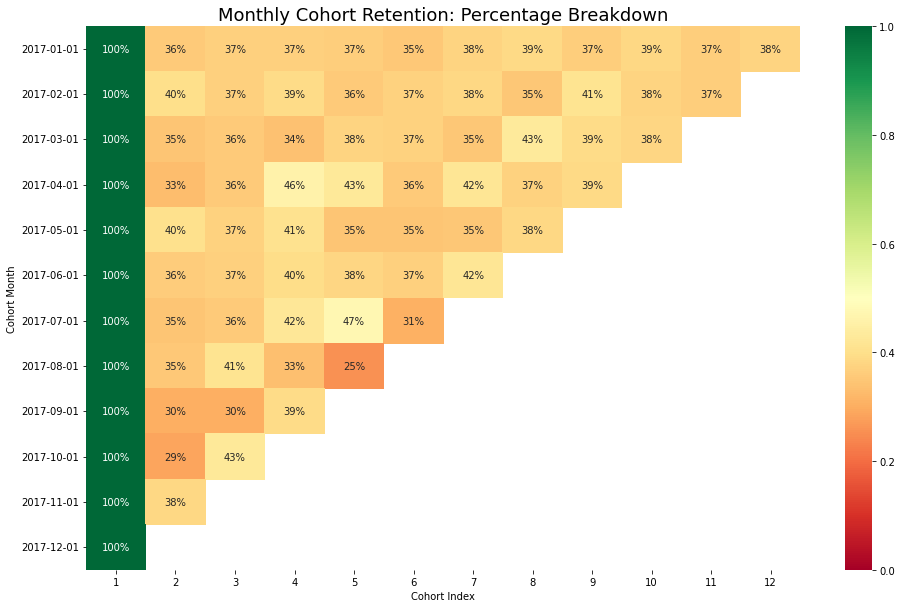

In [25]:
# Initialize the figure
plt.figure(figsize=(16, 10))

# Adding a title
plt.title('Monthly Cohort Retention: Percentage Breakdown', fontsize = 18)

# Creating the seaborn based heatmap
sns.heatmap(data = retention, annot=True, fmt= '.0%',cmap='RdYlGn', vmin = 0.0 , vmax = 1.0)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()